In [1]:
import pandas as pd
from backtest import backtest_dca

import config as cfg

In [2]:
# !python load_data.py

# crypto

In [3]:
df_crypto = pd.read_csv("data/crypto.csv", index_col=0, parse_dates=True)
df_crypto = df_crypto.dropna()
df_crypto

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX
Date,,,,,,,,,,
2023-02-07,23264.291016,1672.003540,333.227875,0.403904,23.861357,0.065774,0.399210,168.081375,7.198653,20.845219
2023-02-08,22939.398438,1650.716797,328.088654,0.398052,23.192671,0.066874,0.394033,165.506104,7.121416,20.081474
2023-02-09,21819.039062,1546.438232,305.960419,0.382466,20.452127,0.062614,0.362531,152.459656,6.983141,17.874453
2023-02-10,21651.183594,1514.869141,305.954132,0.382645,20.130110,0.063323,0.358635,154.554474,6.902424,17.798531
2023-02-11,21870.875000,1539.926758,310.616028,0.384008,20.830095,0.063805,0.369202,161.501602,7.006326,18.029085
...,...,...,...,...,...,...,...,...,...,...
2026-02-02,78688.765625,2344.356689,774.579285,1.620547,104.471153,0.283123,0.298900,386.892914,9.806777,10.142554
2026-02-03,75633.546875,2227.558838,753.578186,1.574199,97.563904,0.285627,0.290788,374.591797,9.450989,9.895763
2026-02-04,73019.703125,2143.504150,697.861755,1.510476,92.029305,0.282773,0.286301,382.406860,9.251476,9.711348


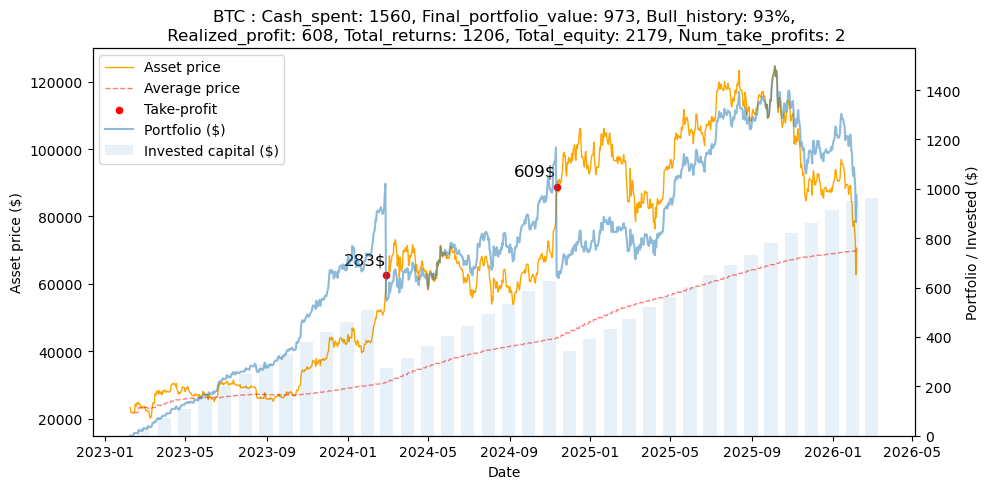

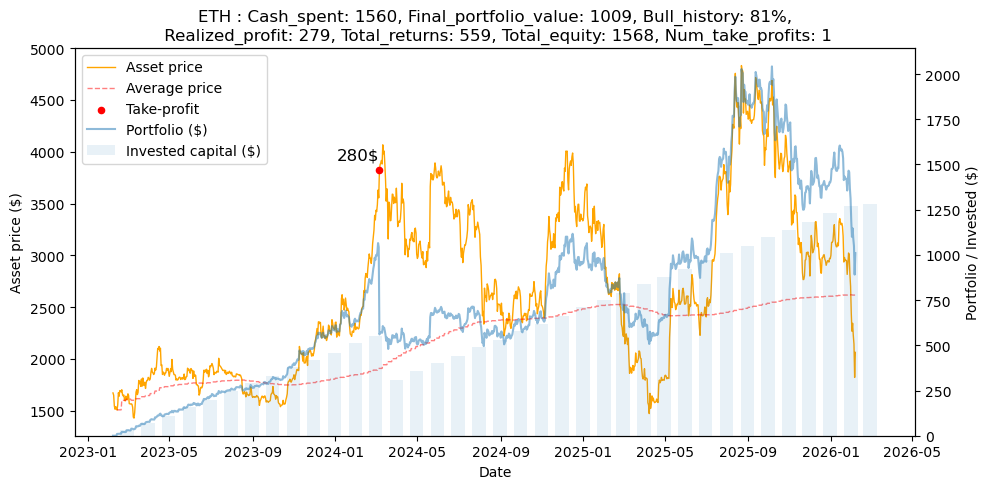

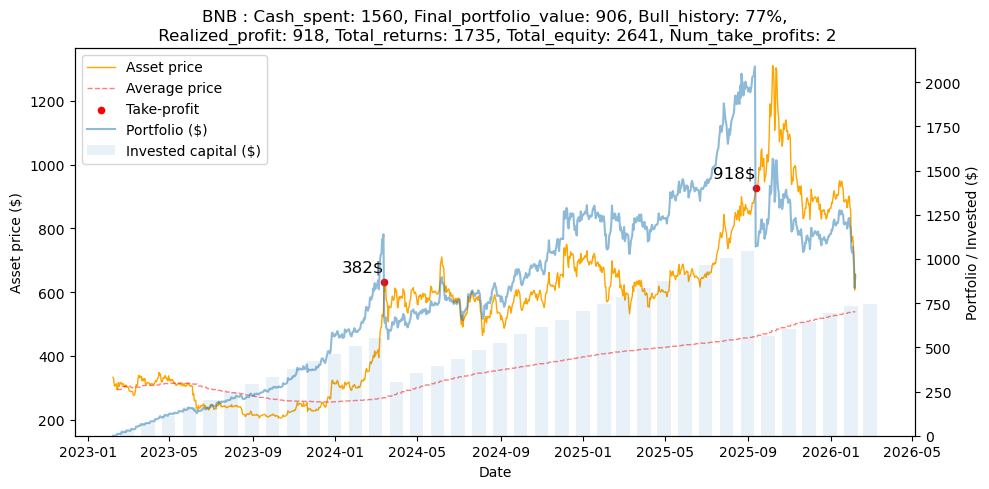

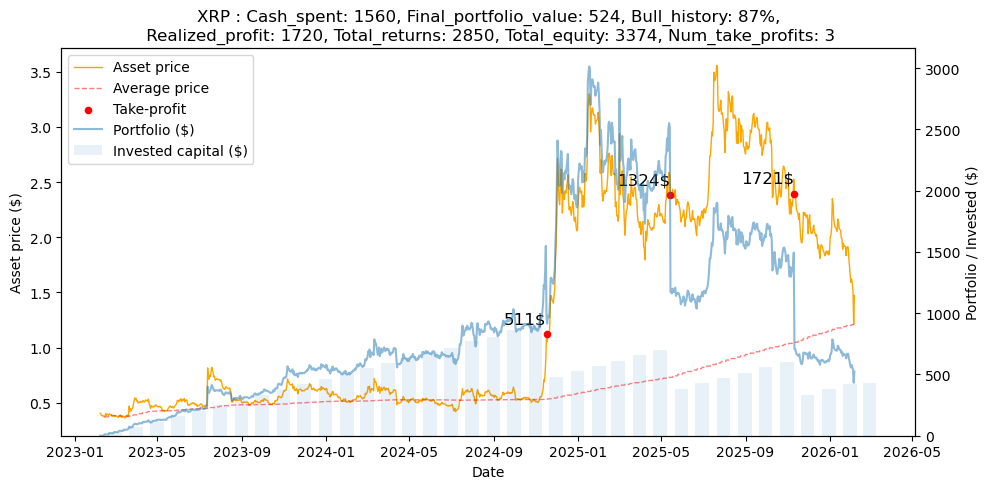

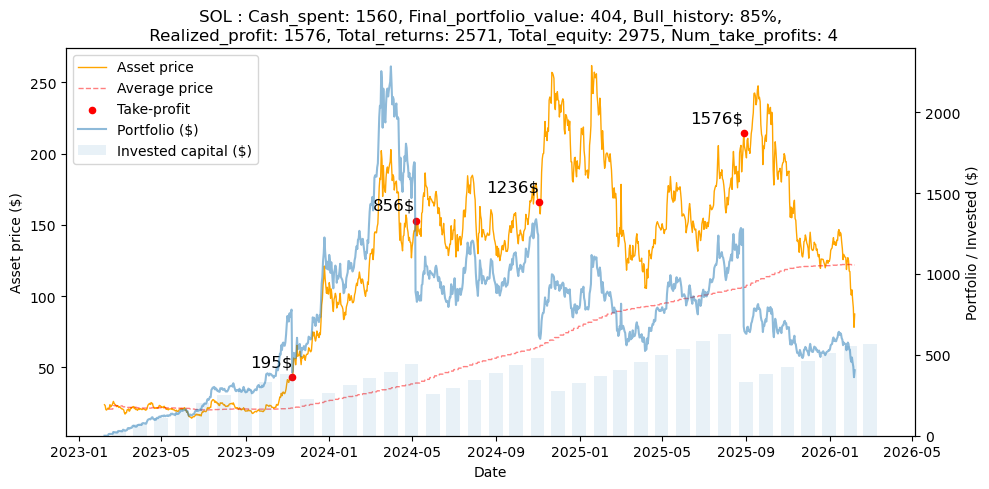

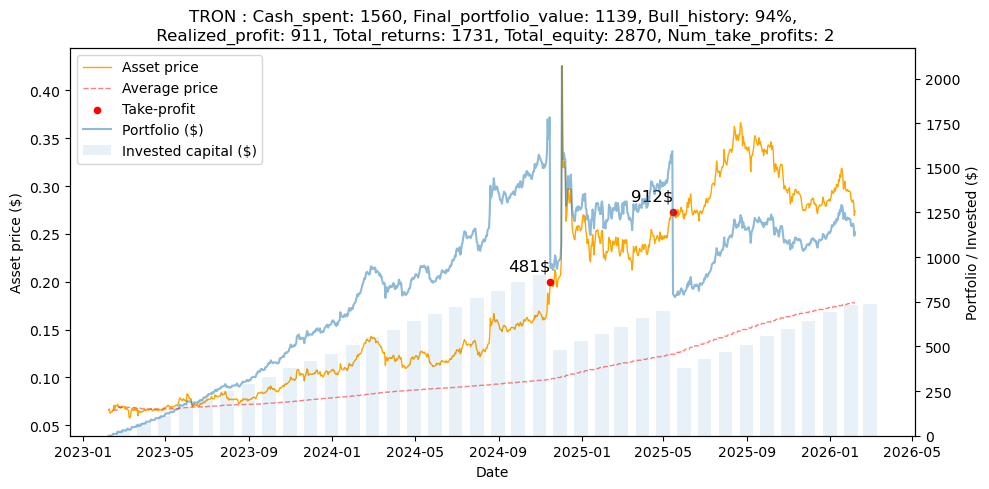

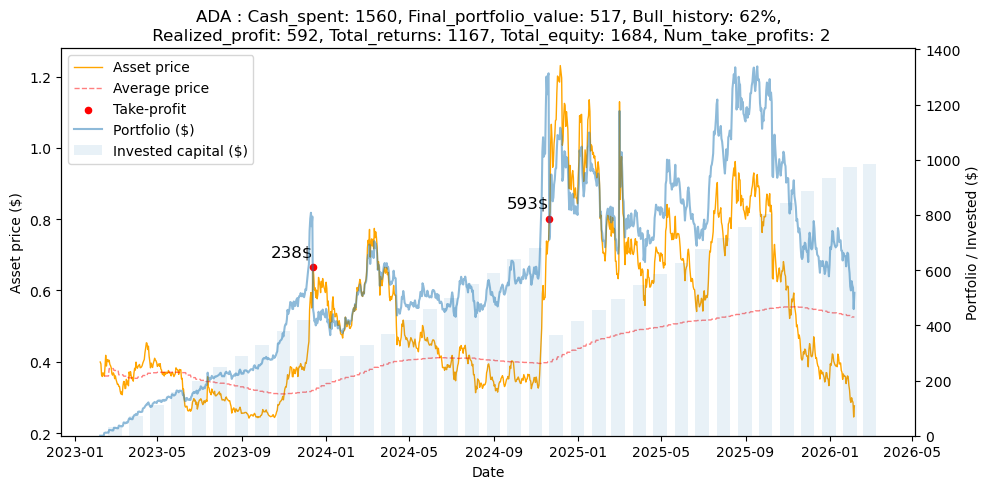

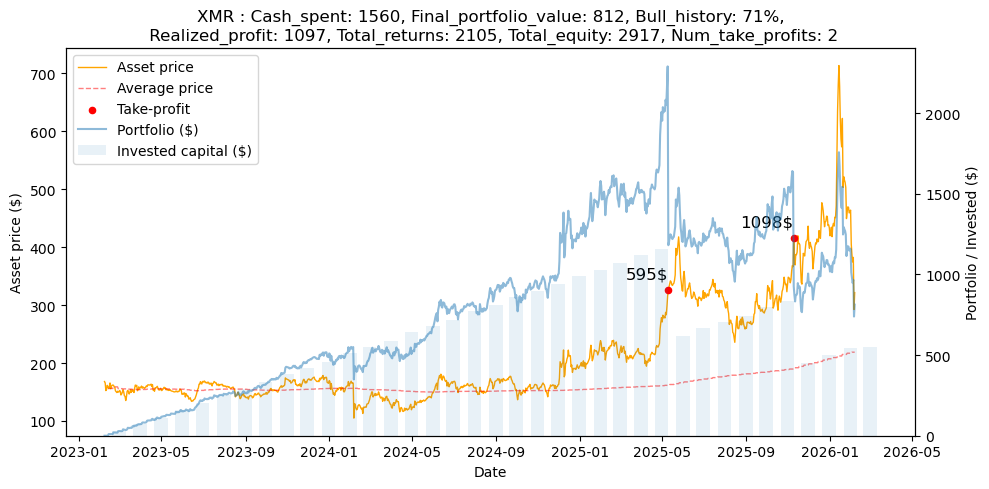

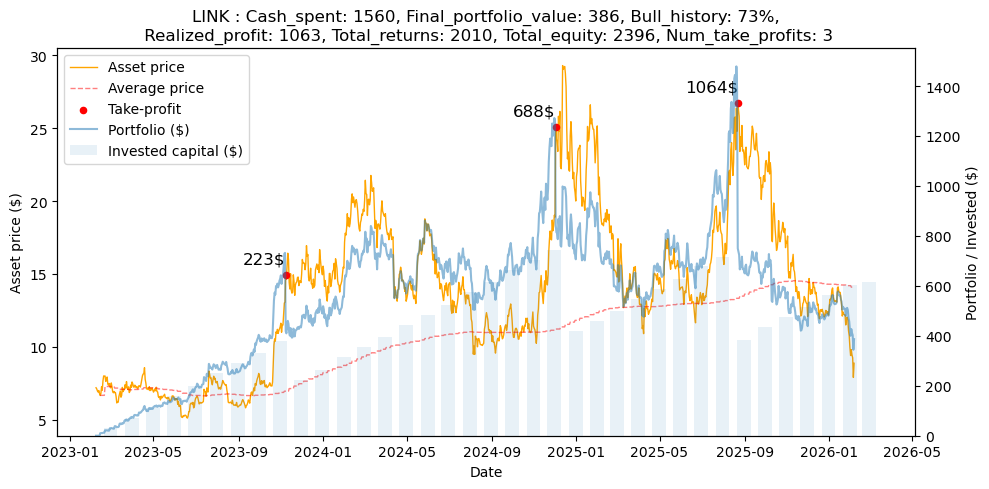

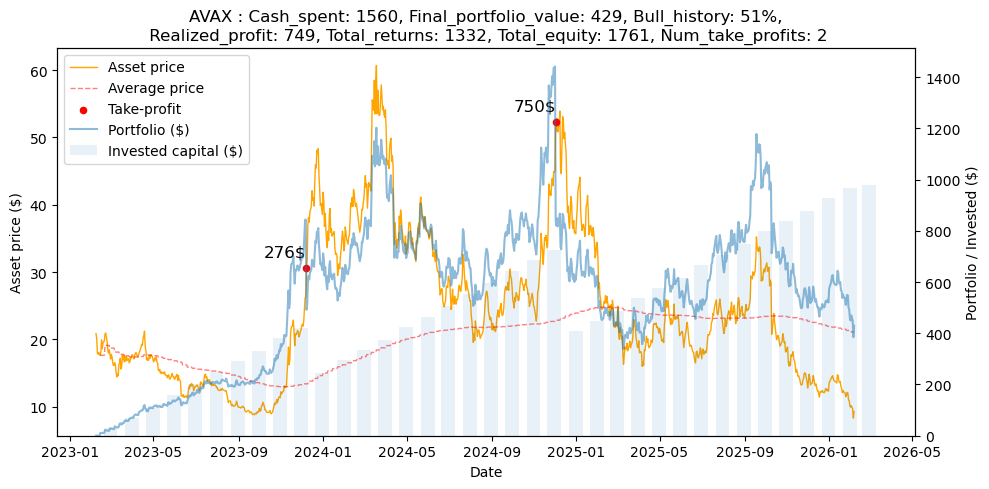

Total invested: $15600.00
Total profit: $9513.00
Total equity: $24365.00


In [4]:
total_invested = 0
total_profit = 0
total_equity = 0

for token in df_crypto.columns:
    token_prices = df_crypto[token]

    result, metrics = backtest_dca(
        target=token,
        prices=token_prices,
        buy_amount=cfg.crypto_regular_amount,
        freq=cfg.crypto_freq,
        fee=cfg.crypto_fee,
        profit_multiple=cfg.crypto_profit_multiple,
        cooldown_days=180,
        plot=True
    )
    total_invested += metrics['Cash_spent']
    total_profit += metrics['Realized_profit']
    total_equity += metrics['Total_equity']

print(f"Total invested: ${total_invested:.2f}")
print(f"Total profit: ${total_profit:.2f}")
print(f"Total equity: ${total_equity:.2f}")

# stocks

In [5]:
df_stocks = pd.read_csv("data/stocks.csv", index_col=0, parse_dates=True)
df_stocks = df_stocks.dropna()
df_stocks

,SPY,ASML.AS
Date,,
2023-02-07,415.190002,621.400024
2023-02-08,410.649994,619.400024
2023-02-09,407.089996,627.200012
2023-02-10,408.040009,611.700012
2023-02-13,412.829987,620.599976
...,...,...
2026-02-02,695.409973,1224.800049
2026-02-03,689.530029,1190.400024
2026-02-04,686.190002,1140.599976


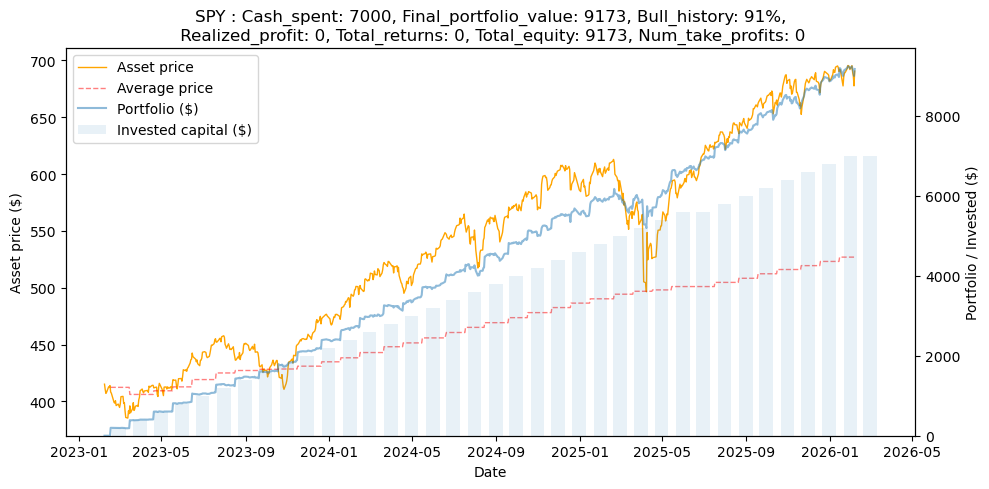

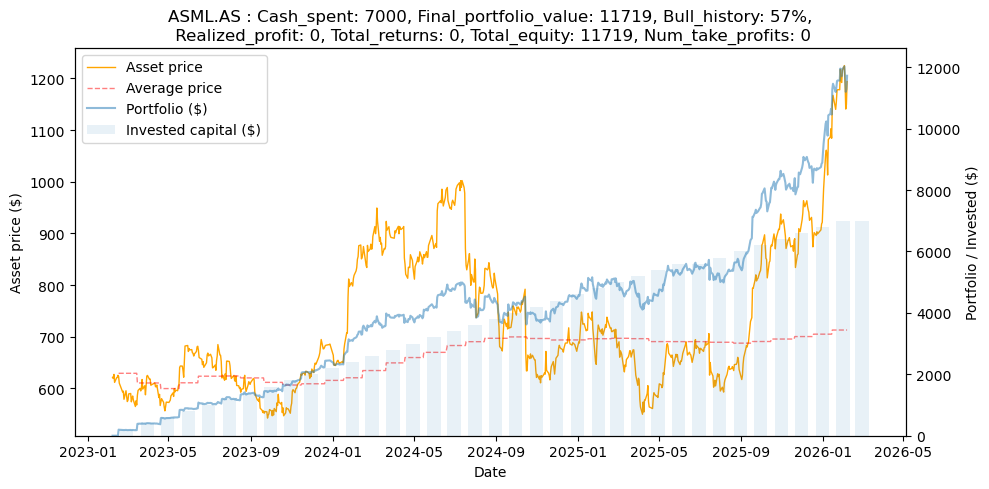

Total invested: $14000.00
Total profit: $0.00
Total equity: $20892.00


In [6]:
total_invested = 0
total_profit = 0
total_equity = 0

for stock in df_stocks.columns:
    stock_prices = df_stocks[stock]

    result, metrics = backtest_dca(
        target=stock,
        prices=stock_prices,
        buy_amount=cfg.stock_regular_amount,
        freq=cfg.stock_freq,
        fee=cfg.stock_fee,
        profit_multiple=cfg.stock_profit_multiple,
        cooldown_days=180,
        plot=True
    )

    total_invested += metrics['Cash_spent']
    total_profit += metrics['Realized_profit']
    total_equity += metrics['Total_equity']

print(f"Total invested: ${total_invested:.2f}")
print(f"Total profit: ${total_profit:.2f}")
print(f"Total equity: ${total_equity:.2f}")